# Coug Data Visualization

In [1]:
# imports
import rosbags_converter as rc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seatrac_enums import CST_E
from matplotlib.ticker import MaxNLocator
from scipy.stats import linregress

/home/claytonsmith/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# User Variables

ROSBAGS_DIR = "~/so_apr_18_bags"
SAVES_DIR = "converted_bags"

MISSION_KEYWORDS = ["5.5"]
VEHCILE_NAMESPACES = ["/coug1", "/coug2", "/coug3"]
VEHICLE_IDS = [1,2]

VERBOSE=True

In [3]:
# Convert Rosbags
dataframes = rc.load_dataframes(SAVES_DIR, keywords=MISSION_KEYWORDS, verbose=True)
if len(dataframes)==0:
    print("converting rosbags")
    typestore = rc.generate_typestore("../../cougars-ros2/src")
    dataframes = rc.convert_rosbags(ROSBAGS_DIR, typestore, 
                                    keywords=MISSION_KEYWORDS,verbose=VERBOSE)
    rc.save_to_csv(dataframes, SAVES_DIR, verbose=VERBOSE)
    dataframes = rc.load_dataframes(SAVES_DIR, keywords=MISSION_KEYWORDS)

Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/coug3_bluey/converted__SO_5.5_multi-2025-04-04-20-54-41
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/base_station/converted__SO_5.5_multi
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/coug1/converted__so_5.5_multi-2025-04-18-16-42-57
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/coug2/converted__SO_5.5_multi-2025-04-18-16-42-59


In [4]:
# display topics by rosbag
for path, topics in dataframes.items():
    print(f"{path}:\n\t{list(topics.keys())}")

coug3_bluey/converted__SO_5.5_multi-2025-04-04-20-54-41:
	['/coug3/dvl/data', '/coug3/modem_rec', '/coug3/dvl/position', '/coug3/modem_status', '/coug3/dvl/velocity', '/coug3/depth_data', '/coug3/dvl/dead_reckoning', '/coug3/modem_imu', '/coug3/pressure/data', '/tf', '/coug3/dvl/dr_global']
base_station/converted__SO_5.5_multi:
	['/modem_rec', '/modem_send', '/modem_status', '/modem_cmd_update']
coug1/converted__so_5.5_multi-2025-04-18-16-42-57:
	['/coug1/extended_fix', '/coug1/dvl/dr_global', '/coug1/modem_rec', '/coug1/controls/command', '/coug1/dvl/dead_reckoning', '/coug1/gps_odom', '/coug1/desired_heading', '/coug1/modem_status', '/coug1/modem_imu', '/coug1/leak/data', '/coug1/safety_status', '/coug1/controls/debug', '/coug1/fix', '/coug1/pressure/data', '/coug1/battery/data', '/coug1/depth_data', '/tf', '/coug1/dvl/position', '/coug1/kinematics/command', '/coug1/desired_speed', '/coug1/desired_depth']
coug2/converted__SO_5.5_multi-2025-04-18-16-42-59:
	['/coug2/desired_heading', 

In [5]:
# lists dataframes by topic. 
# Assumes all vehicles have only one loaded mission and different namespaces
# Check previous cell output to confirm this is the case
dfsByTopic = {}
for topic_dfs in dataframes.values(): dfsByTopic.update(topic_dfs)
print(list(dfsByTopic.keys()))

['/coug3/dvl/data', '/coug3/modem_rec', '/coug3/dvl/position', '/coug3/modem_status', '/coug3/dvl/velocity', '/coug3/depth_data', '/coug3/dvl/dead_reckoning', '/coug3/modem_imu', '/coug3/pressure/data', '/tf', '/coug3/dvl/dr_global', '/modem_rec', '/modem_send', '/modem_status', '/modem_cmd_update', '/coug1/extended_fix', '/coug1/dvl/dr_global', '/coug1/modem_rec', '/coug1/controls/command', '/coug1/dvl/dead_reckoning', '/coug1/gps_odom', '/coug1/desired_heading', '/coug1/modem_status', '/coug1/modem_imu', '/coug1/leak/data', '/coug1/safety_status', '/coug1/controls/debug', '/coug1/fix', '/coug1/pressure/data', '/coug1/battery/data', '/coug1/depth_data', '/coug1/dvl/position', '/coug1/kinematics/command', '/coug1/desired_speed', '/coug1/desired_depth', '/coug2/desired_heading', '/coug2/controls/command', '/coug2/controls/debug', '/coug2/fix', '/coug2/dvl/dr_global', '/coug2/dvl/position', '/coug2/leak/data', '/coug2/safety_status', '/coug2/depth_data', '/coug2/battery/data', '/coug2/pr

In [6]:
# Display a dataframe
ns = VEHCILE_NAMESPACES[0]
print(f"DataFrame example: {ns} desired heading")
sampleDf = dfsByTopic[ns+"/desired_heading"]
print(sampleDf)

DataFrame example: /coug1 desired heading
     header.stamp.sec  header.stamp.nanosec  header.frame_id  desired_heading
0          1745016180             138876016              NaN              0.0
1          1745016180             639011328              NaN              0.0
2          1745016181             139004386              NaN              0.0
3          1745016181             638981945              NaN              0.0
4          1745016182             139015965              NaN              0.0
..                ...                   ...              ...              ...
543        1745016451             639018463              NaN              0.0
544        1745016452             139030950              NaN              0.0
545        1745016452             638966761              NaN              0.0
546        1745016453             138970934              NaN              0.0
547        1745016453             639009900              NaN              0.0

[548 rows x 4 columns

In [7]:
# convert ros timestamps to pandas timestamps

for df in dfsByTopic.values():
    if "header.stamp.sec" in df.columns: 
        df["timestamp"] = pd.to_datetime(
            df["header.stamp.sec"] * 1_000_000_000 
            + df["header.stamp.nanosec"], unit='ns'
        )

bst_timestamps = dfsByTopic["/modem_status"]["timestamp"]
print(f"basestation timeframe:\t{bst_timestamps.min()} --- {bst_timestamps.max()}")
for ns in VEHCILE_NAMESPACES:
    timestamps = dfsByTopic[ns+'/modem_status']['timestamp']
    print(f"{ns} timeframe:\t{timestamps.min()} --- {timestamps.max()}")

basestation timeframe:	2025-04-18 22:42:43.255680539 --- 2025-04-18 22:44:36.028592480
/coug1 timeframe:	2025-04-18 22:42:59.484101776 --- 2025-04-18 22:47:33.937215951
/coug2 timeframe:	2025-04-18 22:43:00.784466207 --- 2025-04-18 22:46:55.201137650
/coug3 timeframe:	2025-04-04 19:54:42.331409795 --- 2025-04-04 19:56:28.605630261


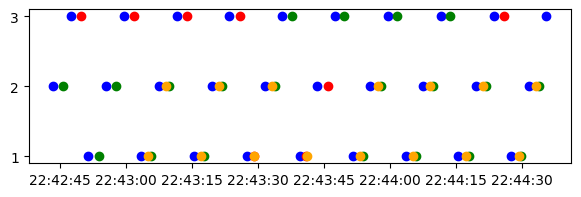

In [8]:
# Base station pings over time with responses (check time sync err)
bst_rec = dfsByTopic["/modem_rec"]
bst_cmd = dfsByTopic["/modem_cmd_update"]
bst_send = bst_cmd[bst_cmd["command_status_code"]==CST_E.CST_OK]
bst_err = bst_cmd[bst_cmd["command_status_code"]!=CST_E.CST_OK]

fig, ax = plt.subplots(figsize=(7, 2))
ax.plot(bst_send["timestamp"], bst_send["target_id"], 'bo')
ax.plot(bst_rec["timestamp"], bst_rec["src_id"], 'go')
ax.plot(bst_err["timestamp"], bst_err["target_id"], 'ro')

for id_, ns in zip(VEHICLE_IDS, VEHCILE_NAMESPACES):
    v_rec = dfsByTopic[ns+'/modem_rec']
    v_rec = v_rec[(v_rec["dest_id"]==id_) & 
                  (v_rec["timestamp"]<=bst_send["timestamp"].max())]
    ax.plot(v_rec["timestamp"], v_rec["dest_id"], 'o', color='orange')

v_rec = v_rec[v_rec["range_dist"]>40]

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()